# Introduction to the Case Study

#### A real estate company operating in the Delhi region has a dataset containing property prices and various 
factors influencing these prices. The company aims to leverage this data to optimize property pricing
strategies by identifying key variables that impact property values. These factors include aspects such a 
the area of the property, the number of bedrooms, the number of bathrooms, parking spaces, and othr 
relevant featus.
 The primary objective is to identify and analyze the variables that most significantly affect house pries. 
The company intends to create a linear model that quantitatively establishes the relationship beween 
house prices and these variables, providing insights into how each factor contributes to the price This 
model will allow the company to assess the importance of different features in determining poperty 
values.

# Objectives And Question

### Case Study Objective:   Predict the House Prices based on the given parameters such as Location, Bedrooms, Areas etc etc
from the data set.

In [2]:
## first import some primary packages!

import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Now import data help of pandas!

df = pd.read_csv("Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 13
0,"1,33,10,000",7500,5,2,3,yes,no,no,no,yes,2,yes,furnished,NaN
1,"1,22,60,000",9040,5,4,4,yes,no,no,no,yes,3,no,furnished,NaN
2,"1,22,60,000",10040,4,2,2,yes,no,yes,no,no,2,yes,semi-furnished,NaN


In [4]:
# i successfull imported data in my notebook!, now understand data...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    object 
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  Unnamed: 13       0 non-null      float64
dtypes: float64(1), int64(5), object(8)
memory usage: 59.7+ KB


In [5]:
# drop unnamed column 

df.drop(['Unnamed: 13'], axis= 1, inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    object
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(5), object(8)
memory usage: 55.5+ KB


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5230.541284,3.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1730.000000,2.000000,1.000000,1.000000,0.000000
25%,3680.000000,3.000000,1.000000,1.000000,0.000000
50%,4680.000000,4.000000,1.000000,2.000000,0.000000
75%,6440.000000,4.000000,2.000000,2.000000,1.000000
max,16280.000000,7.000000,4.000000,4.000000,3.000000


### The dataset is now completely imported, with no missing values in any column!

#  Questions

## Question 1. Perform Data Cleaning and Transformation

In [9]:
# lets understand more about data!

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.rename(columns={'stories' : 'no_of_floors'}, inplace= True)
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'no_of_floors', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### Data Cleaning and Transformation has done!

## Question 2. Prepare the Data by Normalising (converting Text value to numeric)

In [11]:
df.sample(2)

,price,area,bedrooms,bathrooms,no_of_floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
131,"58,20,000",5908,5,1,4,yes,yes,no,no,no,0,no,semi-furnished
112,"60,93,000",4380,7,2,2,yes,no,no,no,no,0,no,furnished


In [12]:
# Map mainrad Yes to 1 and No to 0
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2 , 'semi-furnished':1 , 'unfurnished': 0})

In [13]:
df.head(10)

,price,area,bedrooms,bathrooms,no_of_floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,"1,33,10,000",7500,5,2,3,1,0,0,0,1,2,1,2
1,"1,22,60,000",9040,5,4,4,1,0,0,0,1,3,0,2
2,"1,22,60,000",10040,4,2,2,1,0,1,0,0,2,1,1
3,"1,22,25,000",7580,5,2,2,1,0,1,0,1,3,1,2
4,"1,14,20,000",7500,5,1,2,1,1,1,0,1,2,0,2
5,"1,08,60,000",7580,4,3,1,1,0,1,0,1,2,1,1
6,"1,01,60,000",8660,5,3,4,1,0,0,0,1,2,1,1
7,"1,01,60,000",16280,6,3,2,1,0,0,0,0,0,0,0
8,"98,80,000",8180,5,1,2,1,1,1,0,1,2,1,2
9,"98,10,000",5830,4,2,4,1,1,0,0,1,1,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    object
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   no_of_floors      545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [15]:
# now almost data in convert into int64, but price column is object yet, lets change into float64!

In [16]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].fillna('').astype(str)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   no_of_floors      545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## Question 3. Perform Exploratory data Analysis 

In [17]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'no_of_floors', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

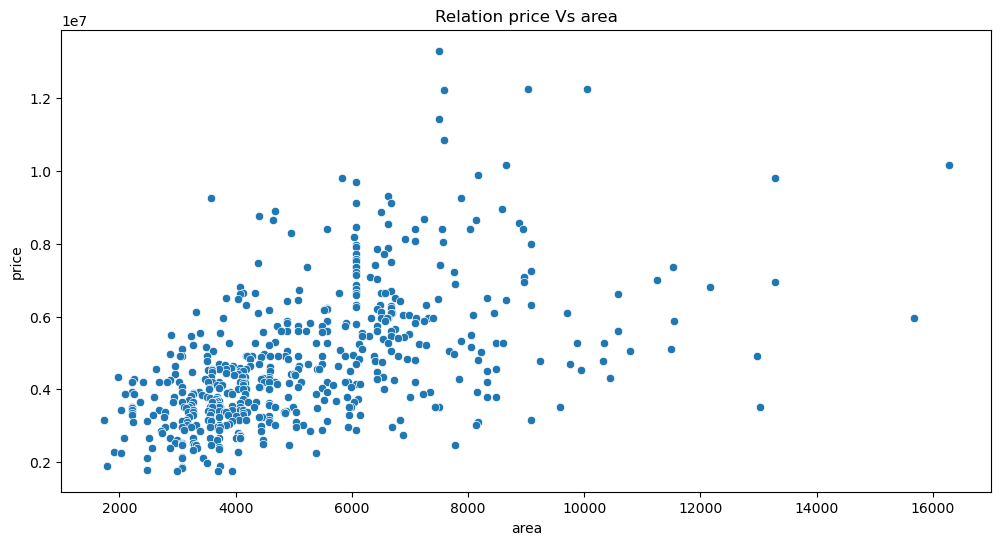

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['area'] , y=df['price'])
plt.title("Relation price Vs area")
plt.show()

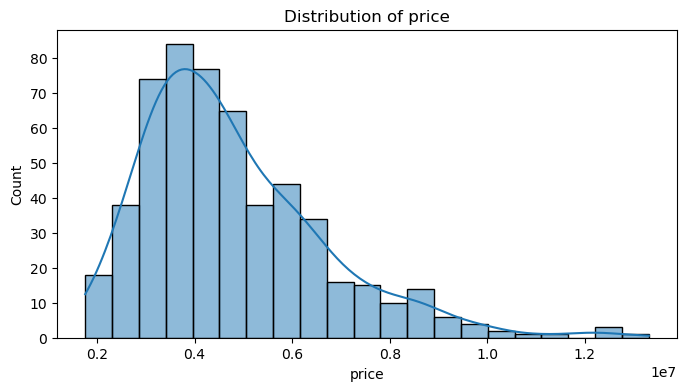

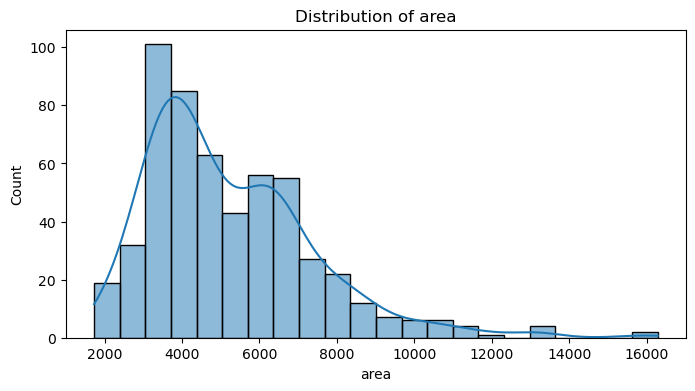

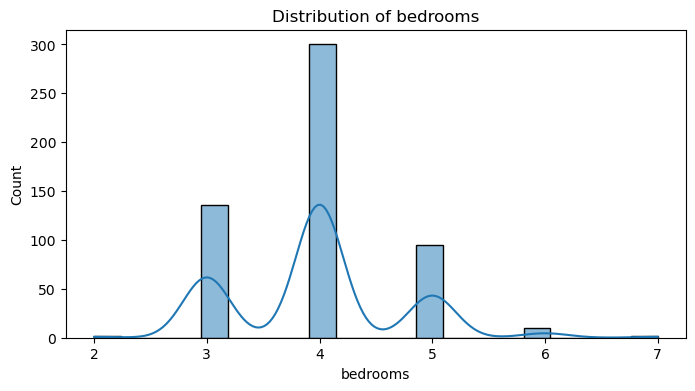

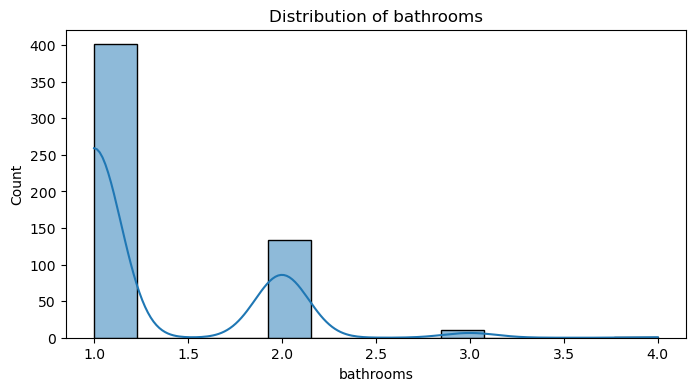

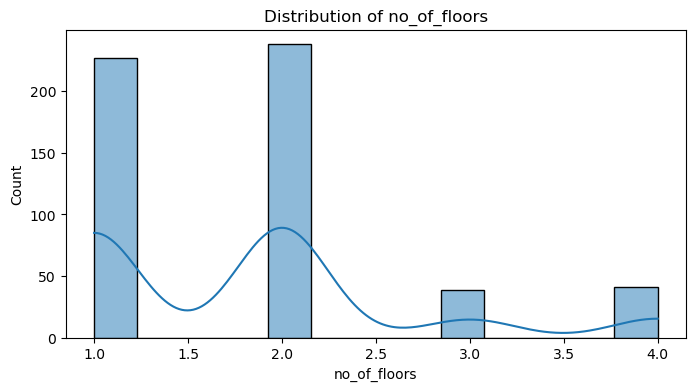

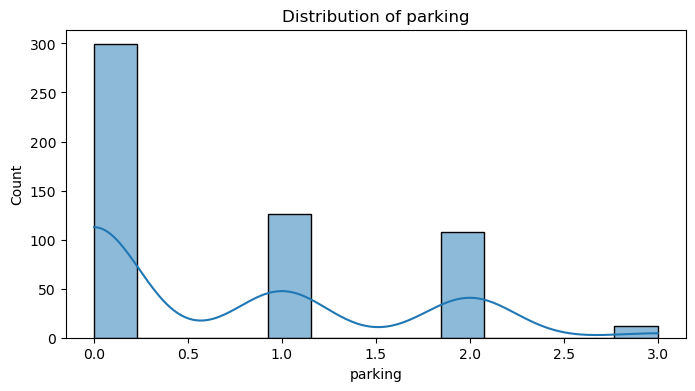

In [19]:
# Visualizing the Data
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'no_of_floors', 'parking']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

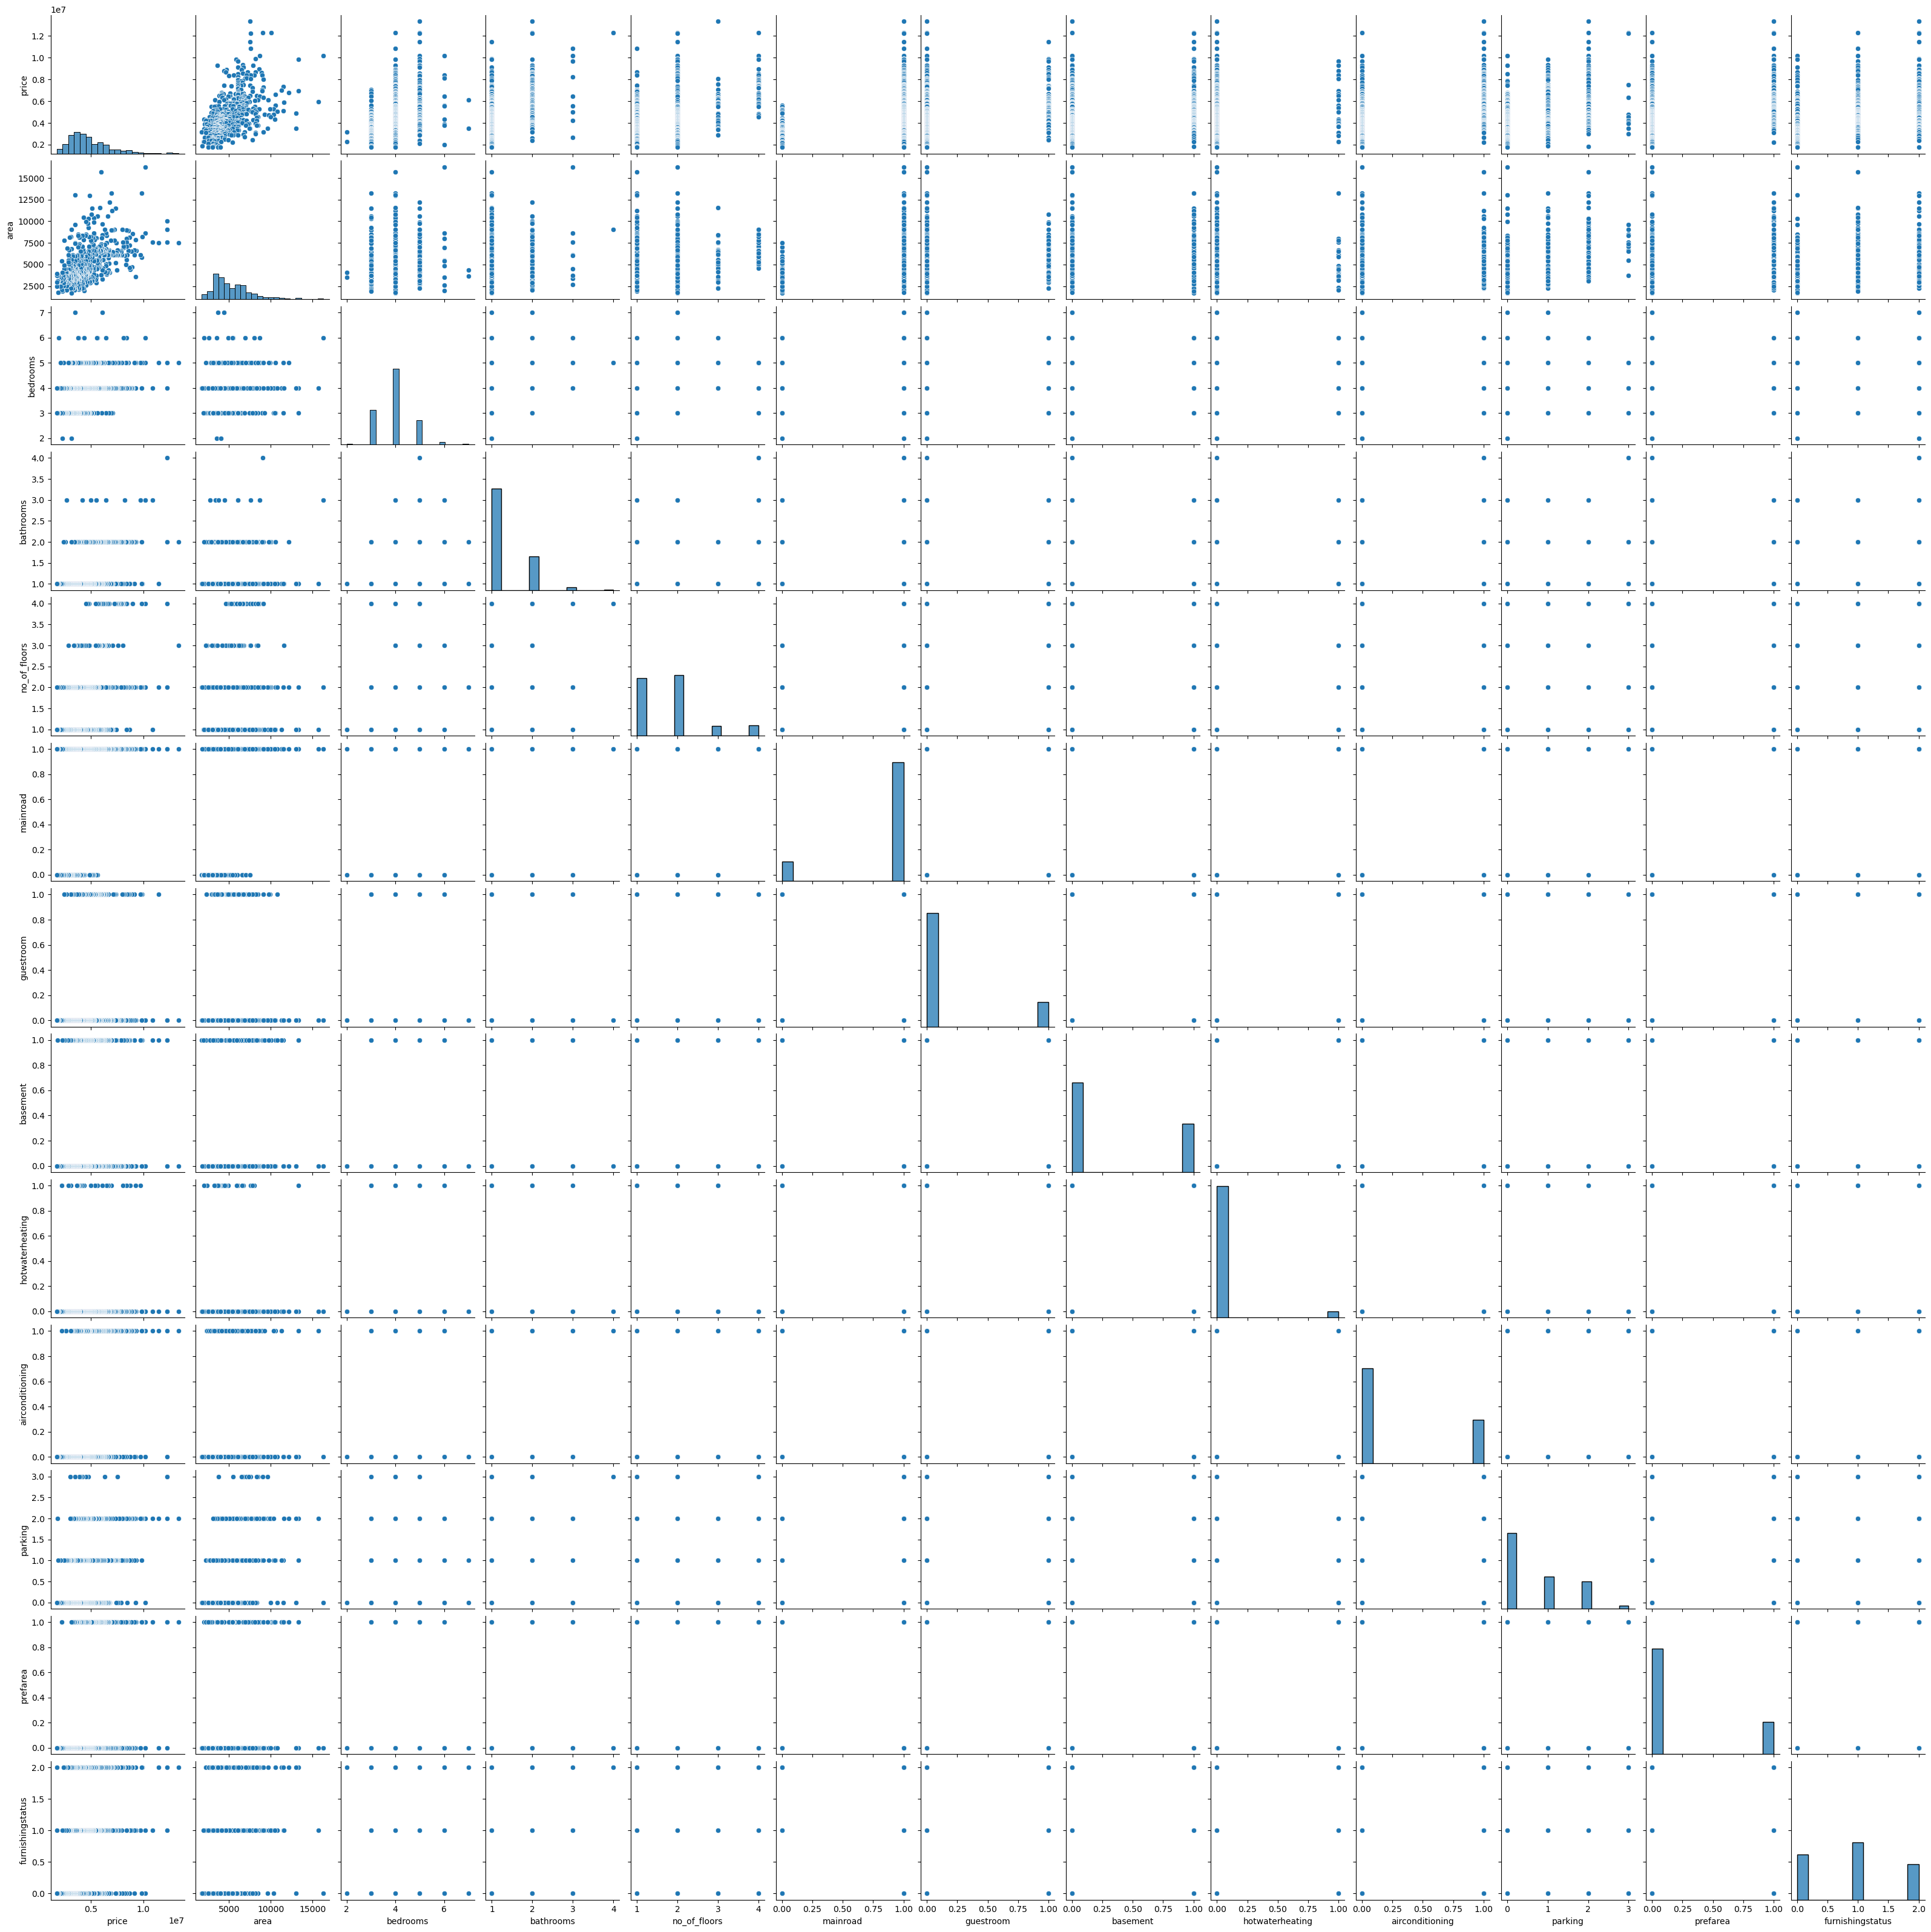

In [20]:
# Pairplot for visualizing relationships
sns.pairplot(df)
plt.show()

## Question 4. Perform Correlation analysis to find out the relation between variables

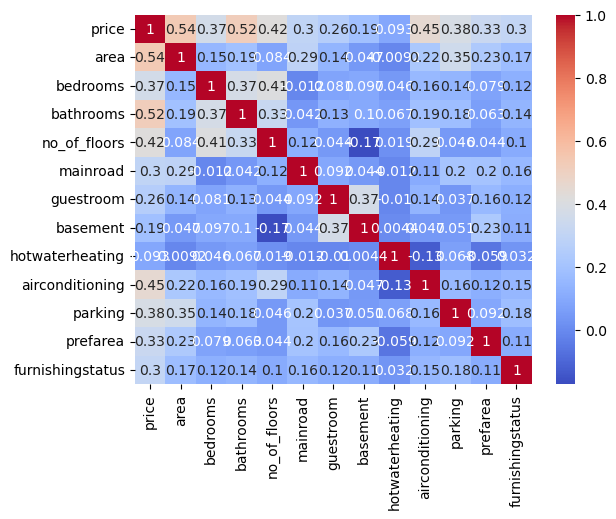

In [21]:
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Key Insights:

Strong Positive Correlation with Price:
Area (0.54): There is a moderate positive correlation between property area and price. As the area increases, the price tends to increase.
Bathrooms (0.52): The number of bathrooms shows a moderate positive relationship with price.
Air Conditioning (0.45): Having air conditioning is moderately positively correlated with price.
Parking (0.38): Availability of parking has a weak to moderate positive impact on the property price.


Weak or Negligible Correlation with Price:
Guestroom (-0.26): The presence of a guestroom has a weak negative correlation with price.
Mainroad (-0.3): The property's proximity to a main road has a weak negative correlation with price.


Significant Multicollinearity Between Independent Variables:
Bathrooms and Area (0.41): The number of bathrooms is positively correlated with the area of the property.
Basement and Hot Water Heating (0.37): Properties with basements are likely to have hot water heating.
Bedrooms and Area (0.37): The number of bedrooms increases with the area of the property.


Negative Correlations:
Mainroad and Air Conditioning (-0.11): Proximity to the main road is slightly negatively correlated with the presence of air conditioning.
No. of Floors and Basement (-0.17): Properties with more floors tend to have a weaker presence of a basement.


Independent Features (Low Correlation with Most Variables):
Furnishing Status: Shows minimal correlation with most variables, indicating it may act independently in influencing price.
Hot Water Heating: Also has weak correlations with other features.

## Question 5. Train the Multiple Linear Regression Model and Predict the House Prices

In [22]:
df.head()

,price,area,bedrooms,bathrooms,no_of_floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13310000,7500,5,2,3,1,0,0,0,1,2,1,2
1,12260000,9040,5,4,4,1,0,0,0,1,3,0,2
2,12260000,10040,4,2,2,1,0,1,0,0,2,1,1
3,12225000,7580,5,2,2,1,0,1,0,1,3,1,2
4,11420000,7500,5,1,2,1,1,1,0,1,2,0,2


In [23]:
x = df.drop('price', axis=1) 
y = df['price'] 

In [24]:
x.head()

,area,bedrooms,bathrooms,no_of_floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7500,5,2,3,1,0,0,0,1,2,1,2
1,9040,5,4,4,1,0,0,0,1,3,0,2
2,10040,4,2,2,1,0,1,0,0,2,1,1
3,7580,5,2,2,1,0,1,0,1,3,1,2
4,7500,5,1,2,1,1,1,0,1,2,0,2


In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(xtrain, ytrain)

LinearRegression()

In [28]:
y_pred = model.predict(xtest)

In [30]:
#comparing the actual result and predicted results
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.5938490180310021

In [31]:
model.intercept_

-620827.5215280643

In [32]:
model.coef_

array([2.37917889e+02, 1.78879916e+05, 8.81147312e+05, 4.74984759e+05,
       4.47671169e+05, 2.09608725e+05, 3.93831744e+05, 6.83754849e+05,
       9.60345226e+05, 2.69375509e+05, 5.87703937e+05, 2.52852487e+05])

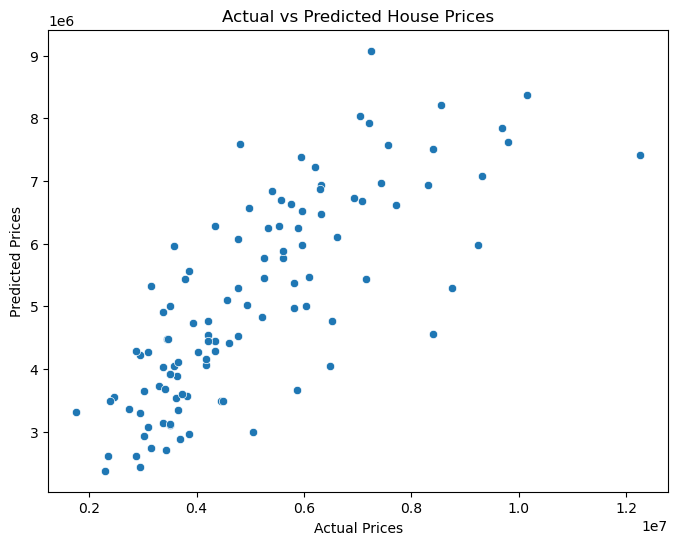

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()